# Intro



```{r}
library(tidyverse)
library(ggthemes)
theme_set(theme_few())
sem <- function(x) {sd(x, na.rm=TRUE) / sqrt(sum(!is.na((x))))}
ci <- function(x) {sem(x) * 1.96} # reasonable approximation 
```


In [95]:
import pandas as pd
import numpy as np
import plotnine as gg
from scipy import stats
import seaborn as sns


This is problem set #4, in which we hope you will practice the visualization package `ggplot2`, as well as hone your knowledge of the packages `tidyr` and `dplyr`. You'll look at two different datasets here. 

First, data on children's looking at social targets from  Frank, Vul, Saxe (2011, Infancy).

Second, data from Sklar et al. (2012) on the unconscious processing of arithmetic stimuli.

In both of these cases, the goal is to poke around the data and make some plots to reveal the structure of the dataset.  

# Part 1

This part is a warmup, it should be relatively straightforward `ggplot2` practice.

Load data from Frank, Vul, Saxe (2011, Infancy), a study in which we measured infants' looking to hands in moving scenes. There were infants from 3 months all the way to about two years, and there were two movie conditions (`Faces_Medium`, in which kids played on a white background, and `Faces_Plus`, in which the backgrounds were more complex and the people in the videos were both kids and adults). An eye-tracker measured children's attention to faces. This version of the dataset only gives two conditions and only shows the amount of looking at hands (other variables were measured as well). 

```{r}
fvs <- read_csv("data/FVS2011-hands.csv")
```


In [96]:
fvs = pd.read_csv("data/FVS2011-hands.csv")


First, use `ggplot` to plot a histogram of the ages of children in the study. NOTE: this is a repeated measures design, so you can't just take a histogram of every measurement. 

```{r}
```


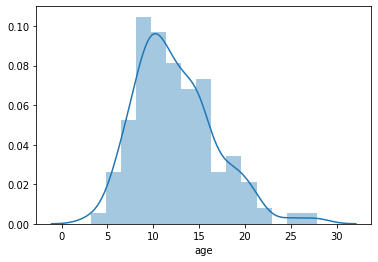

In [97]:
sns.distplot(fvs.age)


Second, make a scatter plot showing hand looking as a function of age and condition. Add appropriate smoothing lines. Take the time to fix the axis labels and make the plot look nice.

```{r}
```


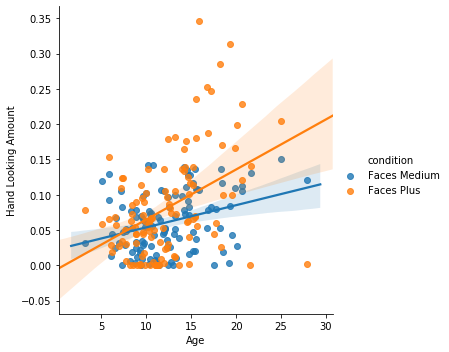

In [98]:
g = sns.lmplot(y='hand.look', x='age', hue='condition', data=fvs)
g = g.set_axis_labels("Age", "Hand Looking Amount")
for t, l in zip(g._legend.texts, ["Faces Medium", "Faces Plus"]): t.set_text(l)


What do you conclude from this pattern of data?

> ANSWER HERE




> Children's hand looking time positively correlates to their age. For movies with more complex scenes, the correlation seems to be stronger.

What statistical analyses would you perform here to quantify these differences?

> ANSWER HERE


> I would compute a linear regression to predict hand looking amount from condition and age, and check the effect size for both factors.


# Part 2

Sklar et al. (2012) claim evidence for unconscious arithmetic processing - they prime participants with arithmetic problems and claim that the authors are faster to repeat the answers. We're going to do a reanalysis of their Experiment 6, which is the primary piece of evidence for that claim. The dataare generously shared by Asael Sklar. (You may recall these data from the `tidyverse` tutorial earlier in the quarter). 

## Data Prep

First read in two data files and subject info. A and B refer to different trial order counterbalances. 

```{r}
subinfo <- read_csv("data/sklar_expt6_subinfo_corrected.csv")
d_a <- read_csv("data/sklar_expt6a_corrected.csv")
d_b <- read_csv("data/sklar_expt6b_corrected.csv")
```


In [99]:
subinfo = pd.read_csv("data/sklar_expt6_subinfo_corrected.csv")
d_a = pd.read_csv("data/sklar_expt6a_corrected.csv")
d_b = pd.read_csv("data/sklar_expt6b_corrected.csv")


`gather` the `d_a` and `d_b` datasets into long ("tidy data") form. If you need to review tidying, [here's the link to R4DS](http://r4ds.had.co.nz/tidy-data.html) (bookmark it!). Remember that you can use `select_helpers` to help in your `gather`ing.

Once you've tidied, bind all the data together into one dataset. Check out `bind_rows`.

The resulting tidy dataset should look like this:

```
    prime prime.result target congruent operand distance counterbalance subid    rt
    <chr>        <int>  <int>     <chr>   <chr>    <int>          <int> <dbl> <int>
 1 =1+2+5            8      9        no       A       -1              1     1   597
 2 =1+3+5            9     11        no       A       -2              1     1   699
 3 =1+4+3            8     12        no       A       -4              1     1   700
 4 =1+6+3           10     12        no       A       -2              1     1   628
 5 =1+9+2           12     11        no       A        1              1     1   768
 6 =1+9+3           13     12        no       A        1              1     1   595
```

```{r}
```



Merge these with subject info. You will need to look into merge and its relatives, `left_` and `right_join`. Call this dataframe `d`, by convention. 

```{r}
```


In [100]:
d = d_melted.join(subinfo.set_index('subid'), on='subid')


Clean up the factor structure (just to make life easier). No need to, but if you want, you can make this more `tidyverse`-ish.

```{r}
d$presentation.time <- factor(d$presentation.time)
levels(d$operand) <- c("addition","subtraction")
```


In [101]:
d['presentation.time'] = d['presentation.time'].astype('category')

In [102]:
d['operand'] = d['operand'].map(lambda x: {'A': 'addition', 'S': 'subtraction'}[x])

In [103]:
d

,prime,prime.result,target,congruent,operand,distance,counterbalance,subid,rt,presentation.time,subjective.test,objective.test
0,=1+2+5,8,9,no,addition,-1,1,1,597.0,1700,0,0.587302
1,=1+3+5,9,11,no,addition,-2,1,1,699.0,1700,0,0.587302
2,=1+4+3,8,12,no,addition,-4,1,1,700.0,1700,0,0.587302
3,=1+6+3,10,12,no,addition,-2,1,1,628.0,1700,0,0.587302
4,=1+9+2,12,11,no,addition,1,1,1,768.0,1700,0,0.587302
...,...,...,...,...,...,...,...,...,...,...,...,...
6155,=9-5-3,1,1,yes,subtraction,0,2,42,699.0,2000,1,0.625000
6156,=9-5-4,0,0,yes,subtraction,0,2,42,805.0,2000,1,0.625000
6157,=9-6-1,2,2,yes,subtraction,0,2,42,700.0,2000,1,0.625000
6158,=9-6-3,0,0,yes,subtraction,0,2,42,699.0,2000,1,0.625000



## Data Analysis Preliminaries

Examine the basic properties of the dataset. First, show a histogram of reaction times.

```{r}
```


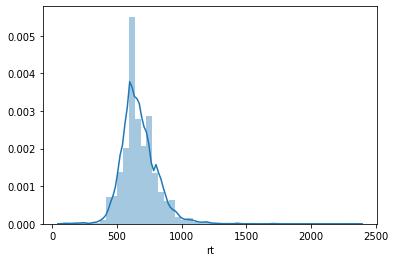

In [108]:
sns.distplot(d.rt[~d.rt.isnull()])


Challenge question: what is the sample rate of the input device they are using to gather RTs?


> Very likely to be 1000 Hz since the smallest interval between values is 1ms


Sklar et al. did two manipulation checks. Subjective - asking participants whether they saw the primes - and objective - asking them to report the parity of the primes (even or odd) to find out if they could actually read the primes when they tried. Examine both the unconscious and conscious manipulation checks. What do you see? Are they related to one another?

```{r}
```


In [112]:
stats.pearsonr(d['subjective.test'], d['objective.test'])

(0.5635046337624035, 0.0)

>There is a significance relationship between the subject and the objective test.


In Experiments 6, 7, and 9, we used the binomial distribution to determine whether each participant performed better than chance on the objective block and excluded from analyses all those participants who did (21, 30, and 7 participants in Experiments 6, 7, and 9, respectively). Note that, although the number of excluded participants may seem high, they fall within the normal range of long-duration CFS priming, in which successful suppression is strongly affected by individual differences (38). We additionally excluded participants who reported any subjective awareness of the primes (four, five, and three participants in Experiments 6, 7, and 9, respectively).
 
OK, let's turn back to the measure and implement Sklar et al.'s exclusion criterion. You need to have said you couldn't see (subjective test) and also be not significantly above chance on the objective test (< .6 correct). Call your new data frame `ds`.

```{r}
```


In [115]:
ds = d[(d['subjective.test'] == 0) & (d['objective.test'] < 0.6)]


## Replicating Sklar et al.'s analysis

![sklar_et_al_2012_facilitation_effect](img/sklar_et_al_2012_facilitation_effect.jpg)

Sklar et al. show a plot of a "facilitation effect" - the amount faster you are for prime-congruent naming compared with prime-incongruent naming. They then show plot this difference score for the subtraction condition and for the two prime times they tested. Try to reproduce this analysis. 

HINT: first take averages within subjects, then compute your error bars across participants, using the `ci` function (defined above). Sklar et al. use SEM (and do it incorectly, actually), but CI is more useful for "inference by eye" as discussed in class.  

HINT 2: remember that in class, we reviewed the common need to `group_by` and `summarise` *twice*, the first time to get means for *each subject*, the second time to compute statistics *across subjects*.

HINT 3: The final summary dataset should have 4 rows and 5 columns (2 columns for the two conditions and 3 columns for the outcome: reaction time, ci, and n).

```{r}
```


In [118]:
ds.head()

,prime,prime.result,target,congruent,operand,distance,counterbalance,subid,rt,presentation.time,subjective.test,objective.test
0,=1+2+5,8,9,no,addition,-1,1,1,597.0,1700,0,0.587302
1,=1+3+5,9,11,no,addition,-2,1,1,699.0,1700,0,0.587302
2,=1+4+3,8,12,no,addition,-4,1,1,700.0,1700,0,0.587302
3,=1+6+3,10,12,no,addition,-2,1,1,628.0,1700,0,0.587302
4,=1+9+2,12,11,no,addition,1,1,1,768.0,1700,0,0.587302


In [155]:
grouped_ds = ds.groupby(['subid', 'operand', 'presentation.time', 'congruent']).rt.mean()
congruent_ds = grouped_ds.unstack()
congruent_ds['effect'] = congruent_ds.no - congruent_ds.yes
congruent_ds.reset_index()

congruent,subid,operand,presentation.time,no,yes,effect
0,1,addition,1700,744.050000,748.921053,-4.871053
1,1,addition,2000,NaN,NaN,NaN
2,1,subtraction,1700,713.888889,677.000000,36.888889
3,1,subtraction,2000,NaN,NaN,NaN
4,3,addition,1700,800.358974,875.450000,-75.091026
...,...,...,...,...,...,...
59,40,subtraction,2000,841.000000,828.484848,12.515152
60,41,addition,1700,NaN,NaN,NaN
61,41,addition,2000,541.461538,554.875000,-13.413462
62,41,subtraction,1700,NaN,NaN,NaN



Now plot this summary, giving more or less the bar plot that Sklar et al. gave (though I would keep operation as a variable here. Make sure you get some error bars on there (e.g. `geom_errorbar` or `geom_linerange`). 

```{r}
```


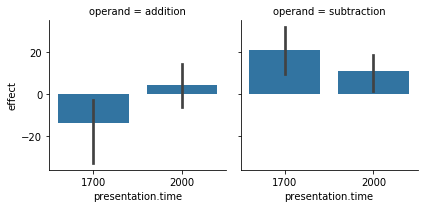

In [156]:
g = sns.FacetGrid(col='operand', data=congruent_ds.reset_index())
g = g.map(sns.barplot, "presentation.time", "effect")


What do you see here? How close is it to what Sklar et al. report? How do you interpret these data? 

> ANSWER


> For addition, we the patten we found some negative effect in our data as comparing to the data found Sklar et al.'s paper, but the result is the same that there is not significant difference. For substraction, although the mean looks close to what the paper indicates, the variance in our result is way larger than what is shown in paper, thus we reached a different result that the difference is insignificant.